### Text clustering using K-Means clustering
- load BBC news data into pandas dataframe
- encode text into tfidf vectors
- use KMeans to cluster encoded text into 5 clusters
- convert different clusters number into category label for each record
- compare clustered category with real category and calculate the total accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

### Gather data

In [2]:
df = pd.read_csv('bbc-text.csv')
print(df.shape, df['category'].nunique())
df.head()

(2225, 2) 5


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


Check the news categories and the number of samples for each category

In [3]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

### Feature extraction
Before running K Means clustering on text, we need to extrect text into features of vector of numeric representation, here we choose TfidfVectorizer from Scikit Learn

In [4]:
vec = TfidfVectorizer()
features= vec.fit_transform(df['text'])
print("Input features shape:", features.shape)
print(f"\nTake a look at the features extracted from the first news article:\n{features[0].toarray()}")

Input features shape: (2225, 29421)

Take a look at the features extracted from the first news article:
[[0.         0.01653311 0.         ... 0.         0.         0.        ]]


Here we see TfidfVectorizer has extrected feature out of text into 29421 feature dimensions

### Apply K-Means clustering

Now we can apply K-Means clustering to the extracted features, and assign each news article to assigned cluster.

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(5, n_init=10, random_state=42)
kmeans.fit(features)
df['cluster'] = kmeans.labels_

In [6]:
df.head(20)

,category,text,cluster
0,tech,tv future in the hands of viewers with home th...,1
1,business,worldcom boss left books alone former worldc...,4
2,sport,tigers wary of farrell gamble leicester say ...,0
3,sport,yeading face newcastle in fa cup premiership s...,0
4,entertainment,ocean s twelve raids box office ocean s twelve...,3
5,politics,howard hits back at mongrel jibe michael howar...,2
6,politics,blair prepares to name poll date tony blair is...,2
7,sport,henman hopes ended in dubai third seed tim hen...,0
8,sport,wilkinson fit to face edinburgh england captai...,0
9,entertainment,last star wars not for children the sixth an...,3


Here we see that each cluster can be mapped to a category nicely, but sample index 19 is mapped to cluster 4 which seems to correspond to business, not tech. Let's exam how data are clustered for each category then we can find the most suited cluster number for each category

In [7]:
for cat in df['category'].unique():
    mark = df['category'] == cat
    print(f"{cat}\n{df[mark]['cluster'].value_counts()}\n")

tech
1    370
3     19
4     12
Name: cluster, dtype: int64

business
4    491
2      8
1      6
3      4
0      1
Name: cluster, dtype: int64

sport
0    358
3    135
4     17
2      1
Name: cluster, dtype: int64

entertainment
3    364
4     14
1      6
0      1
2      1
Name: cluster, dtype: int64

politics
2    352
4     40
3     22
1      3
Name: cluster, dtype: int64



### Assign cluster number to category
Now we assign cluster number to a category if most sample data has the cluster number for the category

In [8]:
cluster_to_category = {}
for cat in df['category'].unique():
    mark = df['category'] == cat
    top = df[mark]['cluster'].value_counts().head(1)
    count = top.values[0]
    cluster = top.index[0]
    print(f"{cat}:\n Top cluster number: {cluster}, Number of samples: {count}")
    cluster_to_category[cluster] = cat

print("\nMap cluster number to category:")
cluster_to_category

tech:
 Top cluster number: 1, Number of samples: 370
business:
 Top cluster number: 4, Number of samples: 491
sport:
 Top cluster number: 0, Number of samples: 358
entertainment:
 Top cluster number: 3, Number of samples: 364
politics:
 Top cluster number: 2, Number of samples: 352

Map cluster number to category:


{1: 'tech', 4: 'business', 0: 'sport', 3: 'entertainment', 2: 'politics'}

Add the clustered_category to data frame

In [9]:
df['clustered_category'] = df['cluster'].map(cluster_to_category)
df.head(20)

,category,text,cluster,clustered_category
0,tech,tv future in the hands of viewers with home th...,1,tech
1,business,worldcom boss left books alone former worldc...,4,business
2,sport,tigers wary of farrell gamble leicester say ...,0,sport
3,sport,yeading face newcastle in fa cup premiership s...,0,sport
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,entertainment
5,politics,howard hits back at mongrel jibe michael howar...,2,politics
6,politics,blair prepares to name poll date tony blair is...,2,politics
7,sport,henman hopes ended in dubai third seed tim hen...,0,sport
8,sport,wilkinson fit to face edinburgh england captai...,0,sport
9,entertainment,last star wars not for children the sixth an...,3,entertainment


Check how accurate K-Means clustering group articles into clusters corresponding to the categories

In [10]:
print('Overall accuracy of clustered categories:', np.mean(df['category'] == df['clustered_category']))

Overall accuracy of clustered categories: 0.8696629213483146


### Use Principle Component Analysis to reduce from high dimensional space to 2 dimensional space for visualization
Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data (https://en.wikipedia.org/wiki/Principal_component_analysis). Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
feature_pca = pca.fit_transform(features.toarray())
feature_pca.shape

(2225, 2)

In [12]:
feature_pca

array([[ 0.12227546, -0.1245349 ],
       [-0.03952617,  0.03563538],
       [ 0.02496665,  0.10593901],
       ...,
       [-0.07591097,  0.00228003],
       [ 0.15039216,  0.00539949],
       [ 0.02454935,  0.15840863]])

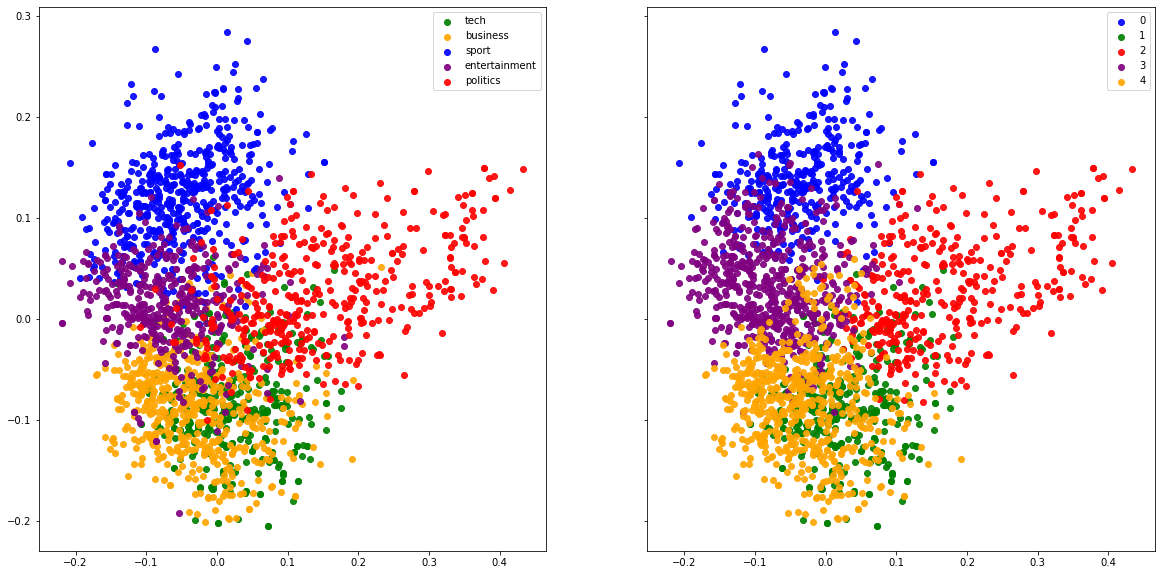

In [13]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(20, 10)
categories = df['category'].unique()
colors = ['green','orange', 'blue', 'purple', 'red']
for i, e in enumerate(categories):
    mark = df['category'] == e
    axes[0].scatter(feature_pca[:, 0][mark], feature_pca[:, 1][mark], color=colors[i], label=e, alpha=0.9)
axes[0].legend();

# use the same set of colors as above to compare side to side of the two graphs
colors = ['blue', 'green', 'red', 'purple', 'orange']
for e in set(kmeans.labels_):
    mark = kmeans.labels_ == e
    axes[1].scatter(feature_pca[:, 0][mark], feature_pca[:, 1][mark], color=colors[e], label=e, alpha=0.9)
axes[1].legend()

As you can see the two graphs are similar with data points grouped by each colored category or cluster. The yellow dots (business) and green dots (tech) have some overlap to each other means they may have similar word tokens, while red dots (politics) can be more easily distinguished from other categories / clusters. We can also see that on the right graph a lot of purple dots belongs to the blue (sport) category from the left graph, that shows a lot of sport news articles were clustered into purple (entertainment) cluster, as above data has shown that 358 news articles were clustered into cluster number 0 and 135 news articles were clustered into cluster number 3.